In [178]:
import datetime as dt
import os
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math


def pull_stock_data(tickers:str, start:str, end:str, interval:str, stripdateindex:str, column:str) -> pd.DataFrame:
    """
    Returns a dataframe with chosen stock information for last day of the month.

    Parameters:
    -------------
    tickers (str): Yahoo finance tickers for companies divided ONLY by single space
    start (str): start date of the period (format yyyy-mm-dd)
    end (str): end date of the period (format yyyy-mm-dd)
    interval (str): wanted interval (1d, 1m, 1y)
    stripdateindex (str): argument for stripping datetime index down (d - day, m - month, y- year)
    columns (list): list of wanted values, args same as in yahoo finance
    """
    # data download
    df = yf.download(tickers = tickers, start = start, end = end, interval = interval, groupby = 'ticker')
    # changing index from datetime to just year and month
    df['Date'] = df.index
    dfg = df.groupby([df.index.year, df.index.month], as_index=False).last()
    dfg.reset_index(inplace=True, drop=True)
    dfg.set_index('Date', inplace=True)
    dfg.index = pd.to_datetime(dfg.index).to_period(stripdateindex)
    # dropping na rows
    dfg.dropna(inplace = True)
    return dfg[column]

    
def save_to_desktop(dataframe:pd.DataFrame, file_name:str):
    """
    Saves dataframe to desktop in csv format under filename provided

    Parameters:
    ------------
    dataframe (pd.DataFrame): dataframe that is to be saved
    file_name (str): name of the file
    """
    # defining path to desktop on running unit
    desktop = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')
    # saving file under chosen name on desktop
    dataframe.to_csv(desktop+'/'+file_name+'.csv', sep=';')



In [179]:
tick = "NKE MSFT XOM INTC CAT WMT JPM F UPS MKC"
st = '2000-12-01'
en = '2020-12-31'
intv = '1d'
strpdt = 'm'
col = ['Close', 'Volume']

dftest = pull_stock_data(tick, st, en, intv, strpdt, col)
dftest.head(5)

[*********************100%***********************]  10 of 10 completed


Close                                                      \
               CAT          F     INTC        JPM        MKC      MSFT   
Date                                                                     
2000-11  19.656250  22.750000  38.0625  36.875000   9.312500  28.68750   
2000-12  23.656250  23.437500  30.0625  45.437500   9.015625  21.68750   
2001-01  22.110001  28.190001  37.0000  54.990002   9.112500  30.53125   
2001-02  20.799999  27.809999  28.5625  46.660000   9.825000  29.50000   
2001-03  22.190001  28.120001  26.3125  44.900002  10.497500  27.34375   

                                                     Volume           \
              NKE        UPS        WMT        XOM      CAT        F   
Date                                                                   
2000-11  5.328125  60.687500  52.187500  44.000000  3984400  8213300   
2000-12  6.976563  58.750000  53.125000  43.468750  3051800  4746800   
2001-01  6.876250  61.900002  56.799999  42.075001  3889000  4553600   
2001-02  4.878750  56.529999  50.090000  40.525002  3025200  4803100   
2001-03  5.043750  56.900002  50.500000  40.500000  3046800  3807000   

                                                                              \
             INTC       JPM      MKC       MSFT       NKE      UPS       WMT   
Date                                                                           
2000-11  78955300  15472400  1342000  197200800   9480000  1442800  11607100   
2000-12  54053600   9657000   998000   99977600   8772800  1096000   6582300   
2001-01  71894200  13130800   264000   81898800   7408000  2782200  10848100   
2001-02  48601400  10510600   962800   84608400  23287200   850200   7748200   
2001-03  47297100   8463000  1899600   91201600   4391200   925700   8308400   

                   
              XOM  
Date               
2000-11  14645600  
2000-12   9564000  
2001-01  17017600  
2001-02  11591200  
2001-03  13186600

# Class 2 Problem set

## Question 1

In [180]:
# We only care about returns -
df1 = dftest['Close']
df1 = df1.pct_change()
df1.head()

,CAT,F,INTC,JPM,MKC,MSFT,NKE,UPS,WMT,XOM
Date,,,,,,,,,,
2000-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12,0.203498,0.030220,-0.210181,0.232203,-0.031879,-0.244009,0.309384,-0.031926,0.017964,-0.012074
2001-01,-0.065363,0.202773,0.230769,0.210234,0.010745,0.407781,-0.014379,0.053617,0.069176,-0.032063
2001-02,-0.059249,-0.013480,-0.228041,-0.151482,0.078189,-0.033777,-0.290493,-0.086753,-0.118134,-0.036839
2001-03,0.066827,0.011147,-0.078775,-0.037720,0.068448,-0.073093,0.033820,0.006545,0.008185,-0.000617


In [181]:
#save_to_desktop(dfsave, 'data')

#### Process F-F risk free rates downloaded previously

In [182]:
fama = pd.read_csv(r"F-F_Research_Data_Factors.CSV", sep=';')
fama['Date'] = pd.to_datetime(fama['Date'].astype('string'), format='%Y%m')
fama.set_index('Date', inplace=True)
fama.index = fama.index.to_period('m')
# Values given in CSV are plain percentages - division by 100
fama = fama.divide(100)
fama.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,0.0296,-0.0256,-0.0243,0.0022
1926-08,0.0264,-0.0117,0.0382,0.0025
1926-09,0.0036,-0.0140,0.0013,0.0023
1926-10,-0.0324,-0.0009,0.0070,0.0032
1926-11,0.0253,-0.0010,-0.0051,0.0031


In [183]:
# Join risk free rates to stock returns in periods
dffull = pd.merge(df1,fama, how='left', left_index=True, right_index=True)
# drop first NULL row which is causing regression to fail
dffull = dffull.dropna()

In [184]:
# Calculate excess stock return for each company
for i in dffull.columns.tolist()[:10]:
    dffull[i+'_re'] = dffull[i]-dffull['RF']
# Calculate excess Market return
dffull['reM'] = dffull['Mkt-RF']-dffull['RF']
dffull.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 241 entries, 2000-12 to 2020-12
Freq: M
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CAT      241 non-null    float64
 1   F        241 non-null    float64
 2   INTC     241 non-null    float64
 3   JPM      241 non-null    float64
 4   MKC      241 non-null    float64
 5   MSFT     241 non-null    float64
 6   NKE      241 non-null    float64
 7   UPS      241 non-null    float64
 8   WMT      241 non-null    float64
 9   XOM      241 non-null    float64
 10  Mkt-RF   241 non-null    float64
 11  SMB      241 non-null    float64
 12  HML      241 non-null    float64
 13  RF       241 non-null    float64
 14  CAT_re   241 non-null    float64
 15  F_re     241 non-null    float64
 16  INTC_re  241 non-null    float64
 17  JPM_re   241 non-null    float64
 18  MKC_re   241 non-null    float64
 19  MSFT_re  241 non-null    float64
 20  NKE_re   241 non-null    float64
 2

#### Regress Excess Stock returns (<STOCK_NAME>_re) on Excess Market returns (reM)
* intercept is the Alpha 
* coefficient for reM is the company's Beta

**TODO**: komentarz na końcu do różnic miedzy wynikami

In [185]:
def get_significance(pvalue):
    '''
    Helper function to make p-value visual with use of stars
    '''
    if pvalue > 0.1: return ''
    elif pvalue > 0.05: return '*'
    elif pvalue> 0.01: return '**'
    else: return '***'


In [186]:
def reg_it(df:pd.DataFrame, cols):
    # Exog variable is constant - it's always Excess Market return
    X = sm.add_constant(df['reM'])
    # Store results in dict
    reg_results = {}
    for stock in cols:
        y = df[stock]
        reg_model = sm.OLS(y, X).fit()
        CAPM_params = {'AVG_excess_return' : y.mean(), 
            "alpha" : reg_model.params[0], # In Excel it's in %, but I'd rather keep it as fraction here for further calculations 
            "beta" : reg_model.params[1],
            "beta_pvalue" : get_significance(reg_model.pvalues[1]),
            "R2adj" : reg_model.rsquared_adj,
        }
        reg_results[stock[:-3]] = CAPM_params

    results_df = pd.DataFrame.from_dict(reg_results, orient='index')
    # Save it to .csv in our folder (you can copy from this output dataframe and paste to excel directly tough...)
    # results_df.to_csv('Q1_results.csv', sep=';')
    return results_df

In [187]:
colsreg = [x for x in dffull.columns.tolist() if '_re' in x]

results_df = reg_it(dffull, colsreg)
results_df


,AVG_excess_return,alpha,beta,beta_pvalue,R2adj
CAT,0.012036,0.005022,1.318824,***,0.453400
F,0.003604,-0.005321,1.678080,***,0.289182
INTC,0.004180,-0.002183,1.196434,***,0.344468
JPM,0.007649,0.000701,1.306491,***,0.476043
MKC,0.009674,0.007874,0.338422,***,0.096995
MSFT,0.010127,0.005007,0.962614,***,0.331617
NKE,0.014861,0.010795,0.764580,***,0.256743
UPS,0.004868,0.000784,0.767901,***,0.327177
WMT,0.004389,0.002323,0.388626,***,0.114231
XOM,0.000327,-0.003574,0.733448,***,0.323264


#### Estimate SML
* regress Average Excess Stock returns on estimated market Betas for each stock
* we obtain lambda_0 (constant) and lambda_1 (price of risk)

In [188]:
# this part gets random 10 consecutive months
from random import seed

random.seed(10)


nrows = range(dffull.shape[0])
ix = random.randint(nrows.start, nrows.stop-10)
smldf = dffull.iloc[ix:ix+10,:]

smlstuff = reg_it(smldf, colsreg)


In [189]:
# for whole
SML_model = sm.OLS(results_df['AVG_excess_return'], sm.add_constant(results_df['beta'])).fit()
# for 10 consecutive months
SML_model2 = sm.OLS(smlstuff['AVG_excess_return'], sm.add_constant(smlstuff['beta'])).fit()
print(f'''
    For the whole period:
    lambda_0 : {SML_model.params[0]},
    lambda_1 : {SML_model.params[1]},
    R2_adj : {SML_model.rsquared_adj}

    For random 10 consecutive months:
    lambda_0 : {SML_model2.params[0]},
    lambda_1 : {SML_model2.params[1]},
    R2_adj : {SML_model2.rsquared_adj}
'''
)



    For the whole period:
    lambda_0 : 0.007642577229054324,
    lambda_1 : -0.0004983182596193978,
    R2_adj : -0.12242167834294149

    For random 10 consecutive months:
    lambda_0 : 0.020522594428198735,
    lambda_1 : -0.003139216142433045,
    R2_adj : -0.11073183334289771



**COMMENT HERE ABOUT DIFFERENCES IN RESULTS**

## Question 2
*Repeat your analysis (as in Question 1) for each of the four 5-year periods. For a selected company andfor the EW portfolio, compare the dynamics of the market beta over the 5-year periods. What can you sayabout the stability of your estimates (specifically the market beta)?*

### Dividing dataframe into 4 parts and applying regression for all of them

In [190]:

todiv = len(dffull)
p1, p2, p3, p4, p5 = np.linspace(1,todiv, 5)
dfq1 = dffull.iloc[0:math.floor(p2),:]
dfq2 = dffull.iloc[math.ceil(p2):math.floor(p3)]
dfq3 = dffull.iloc[math.ceil(p3):math.floor(p4)]
dfq4 = dffull.iloc[math.ceil(p4):math.floor(p5)]

q1result = reg_it(dfq1, colsreg) 
q2result = reg_it(dfq2, colsreg)
q3result = reg_it(dfq3, colsreg)
q4result = reg_it(dfq4, colsreg)

display(q1result)
display(q2result)
display(q3result)
display(q4result)

,AVG_excess_return,alpha,beta,beta_pvalue,R2adj
CAT,0.019283,0.020360,1.183495,***,0.392189
F,-0.012557,-0.011156,1.539865,***,0.311006
INTC,0.000544,0.002530,2.182021,***,0.499099
JPM,0.004229,0.005702,1.618560,***,0.525863
MKC,0.007646,0.007727,0.088478,,-0.010041
MSFT,0.001006,0.002016,1.110676,***,0.247724
NKE,0.012876,0.013525,0.713195,***,0.155671
UPS,0.002760,0.003214,0.499013,***,0.211354
WMT,-0.001923,-0.001379,0.598315,***,0.194730
XOM,0.003565,0.004067,0.551980,***,0.194322


,AVG_excess_return,alpha,beta,beta_pvalue,R2adj
CAT,0.012964,0.012578,1.706277,***,0.610381
F,0.032349,0.031797,2.436180,***,0.304946
INTC,-0.001392,-0.001638,1.084516,***,0.490765
JPM,0.003862,0.003611,1.103043,***,0.350204
MKC,0.006174,0.006082,0.404039,***,0.176122
MSFT,0.002451,0.002214,1.049137,***,0.457580
NKE,0.011840,0.011642,0.876196,***,0.431707
UPS,-0.000043,-0.000228,0.815843,***,0.382816
WMT,0.001630,0.001565,0.289971,**,0.088876
XOM,0.003898,0.003799,0.440538,***,0.186359


,AVG_excess_return,alpha,beta,beta_pvalue,R2adj
CAT,-0.002375,-0.018457,1.594074,***,0.497085
F,-0.000379,-0.013414,1.292063,***,0.375580
INTC,0.010127,0.001711,0.834265,***,0.206084
JPM,0.010230,-0.005947,1.603537,***,0.556698
MKC,0.010964,0.005849,0.507031,***,0.183360
MSFT,0.013390,0.004789,0.852599,***,0.210584
NKE,0.019905,0.013895,0.595741,***,0.101370
UPS,0.005587,-0.003091,0.860226,***,0.493032
WMT,0.003254,0.000745,0.248688,,0.015947
XOM,0.002067,-0.006827,0.881678,***,0.447804


,AVG_excess_return,alpha,beta,beta_pvalue,R2adj
CAT,0.018150,0.007110,0.922251,***,0.339972
F,-0.004730,-0.019442,1.228874,***,0.440103
INTC,0.007500,-0.000589,0.675713,***,0.182260
JPM,0.012333,-0.001498,1.155250,***,0.583429
MKC,0.013944,0.009409,0.378877,**,0.084995
MSFT,0.023812,0.014859,0.747813,***,0.433092
NKE,0.014857,0.005424,0.787910,***,0.316414
UPS,0.011203,0.000343,0.907093,***,0.285646
WMT,0.014703,0.010272,0.370084,***,0.104676
XOM,-0.008278,-0.023408,1.263813,***,0.587506


* ### Plotting difference between one comapny and whole portfolio

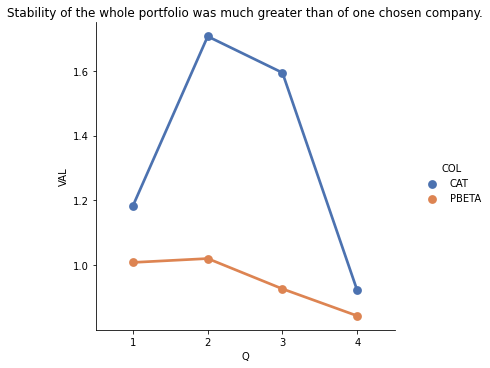

In [191]:
dfplot = {'Q':[1,2,3,4, 1,2,3,4], 'COL':['CAT','CAT','CAT','CAT', 'PBETA', 'PBETA', 'PBETA', 'PBETA'] ,'VAL':[q1result.iloc[0, 2], q2result.iloc[0, 2], q3result.iloc[0, 2], q4result.iloc[0, 2], q1result['beta'].mean(), q2result['beta'].mean(), q3result['beta'].mean(), q4result['beta'].mean()]}
dfplot = pd.DataFrame(dfplot)

sns.catplot(x='Q', y='VAL', hue='COL' , data=dfplot, kind='point', palette = 'deep')
plt.title('Stability of the whole portfolio was much greater than of one chosen company.')
plt.show()

## Question 3
*For each company and for the Equally-Weighted (EW) portfolio of the 10 stocks. estimate the basic perfor-mance measures for the 20-year period and discuss their meaning. Break them also into four 5-year periodsand discuss how the performance was changing over time. Finally, for the EW portfolio, plot how the valueof 1$ invested into this portfolio changes over time and what is its value after the 20 years.*

### Calculating performance metrics

MEASURES:
* Sharpe - (return-rf)/std
* Jenson's alpha - portfolio_return/(rf + Beta(return of market rf rate of return))

**TODO** teraz jest dla oddzielnych akcji trzeba też policzyć dla całego portfolio, podzielić całość na 5 letnie okresy i porównać ze sobą

In [192]:
dfperform = pd.DataFrame()

# loop calculating performance measures for all companies in the portfolio
for i in dffull.columns.tolist()[:10]:
    # sharpe
    dfperform[i+'_sh'] = (dffull[i+'_re']-dffull['RF'])/np.std(dffull[i+'_re']) #<- w _re juz jest odjeta risk free rate, nie?
    # Jenson's
    dfperform[i+'_jen'] = (dffull[i+'_re'] - (dffull['RF'] + dffull['SMB'] * (dffull['reM'] - dffull['RF'])))

dfperform

,CAT_sh,CAT_jen,F_sh,F_jen,INTC_sh,INTC_jen,JPM_sh,JPM_jen,MKC_sh,MKC_jen,MSFT_sh,MSFT_jen,NKE_sh,NKE_jen,UPS_sh,UPS_jen,WMT_sh,WMT_jen,XOM_sh,XOM_jen
Date,,,,,,,,,,,,,,,,,,,,
2000-12,2.192920,0.193484,0.144201,0.020206,-2.400962,-0.220194,2.604151,0.222190,-0.869727,-0.041893,-3.378595,-0.254022,4.419411,0.299371,-0.694426,-0.041940,0.155814,0.007950,-0.380521,-0.022088
2001-01,-0.863162,-0.077535,1.369089,0.190602,2.398657,0.218598,2.337299,0.198062,-0.001137,-0.001426,5.280283,0.395610,-0.371678,-0.026550,0.709187,0.041446,1.142112,0.057005,-0.738900,-0.044235
2001-02,-0.757607,-0.067703,-0.150335,-0.021934,-2.569545,-0.236495,-1.864390,-0.159936,1.465964,0.069735,-0.550358,-0.042231,-4.400345,-0.298947,-1.562784,-0.095207,-2.459930,-0.126588,-0.766063,-0.045293
2001-03,0.662156,0.058621,0.019592,0.002942,-0.950597,-0.086980,-0.540507,-0.045925,1.247046,0.060242,-1.083949,-0.081299,0.375244,0.025615,-0.030721,-0.001660,-0.004201,-0.000020,-0.155439,-0.008823
2001-04,1.397821,0.122946,0.289290,0.040170,1.820256,0.166533,0.712519,0.060403,-1.492415,-0.072257,3.073314,0.230663,0.418987,0.027990,0.030908,0.001472,0.327795,0.016361,1.482982,0.085633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08,0.801998,0.070934,0.225147,0.031737,0.733468,0.067430,0.428170,0.036702,1.199916,0.057946,1.328683,0.100060,2.156628,0.146264,2.416889,0.146087,1.424879,0.072997,-0.880124,-0.050888
2020-09,0.542446,0.047879,-0.168738,-0.023646,0.175458,0.016105,-0.460884,-0.039311,-1.222809,-0.058866,-0.899111,-0.067582,1.797895,0.121809,0.301389,0.018211,0.145446,0.007449,-2.424783,-0.140646
2020-10,0.598010,0.053691,1.144352,0.161385,-1.581629,-0.144119,0.213132,0.019110,-1.458202,-0.069291,-0.499720,-0.036646,-0.644968,-0.042768,-0.949610,-0.056408,-0.166124,-0.007567,-0.862112,-0.049086


Ponizej jest policzone sharpe, traynor i jensens dla całego periodu i 5-letnich okresów za pomocą funkcji calc_perf. Jensens alpha wziąłem z regresji liniowej, tak samo jak betę do policzenia treynora

In [193]:
def calc_perf(df, reg_df):
    '''
    Function calculating performance metrics 
    
    Parameters:
    df -> dataframe with stock excess returns
    reg_df -> regressions output dataframe with alphas and betas for each stock
    '''

    # create an empty list to be filled with sharpe ratio
    sr = list()
    tr = list()

    # loop through stock excess returns and calculate Sharpe ratio and Treynor ratio for each, append to list. Jensens alpha will be just the intercept from the reg_df
    for i in df.columns.tolist()[:10]:
        sr.append(
            df[i+'_re'].mean() / np.std(df[i+'_re'])
            )   
        tr.append(
            df[i+'_re'].mean() / reg_df.loc[i, "beta"]
            )

    return [sr, tr, list(reg_df['alpha'].values)]

In [197]:
def calc_portfolio_perf(df, reg_df):
    '''
    Function calculating performance metrics for EW portfolio
    
    Parameters:
    df -> dataframe with stock excess returns
    reg_df -> regressions output dataframe with alphas and betas for each stock
    '''
    ew_rets = df.filter(regex='_re').sum(1) / 10

    sr = ew_rets.mean() / np.std(ew_rets)
    tr = ew_rets.mean() / reg_df["beta"].mean()
    ja = reg_df["alpha"].mean()

    return [sr, tr, ja]



In [195]:
# calculate preformance metrics using created function
res_all = calc_perf(dffull, results_df)
res_q1 = calc_perf(dfq1, q1result)
res_q2 = calc_perf(dfq2, q2result)
res_q3 = calc_perf(dfq3, q3result)
res_q4 = calc_perf(dfq4, q4result)

# create df with calculated data
dfperform_all = pd.DataFrame(data=np.transpose(res_all), index=q1result.index, columns=['sharpeRatio', 'treynorRatio', 'jensensAlpha'])
dfperform_q1 = pd.DataFrame(data=np.transpose(res_q1), index=q1result.index, columns=['sharpeRatio', 'treynorRatio', 'jensensAlpha'])
dfperform_q2 = pd.DataFrame(data=np.transpose(res_q2), index=q1result.index, columns=['sharpeRatio', 'treynorRatio', 'jensensAlpha'])
dfperform_q3 = pd.DataFrame(data=np.transpose(res_q3), index=q1result.index, columns=['sharpeRatio', 'treynorRatio', 'jensensAlpha'])
dfperform_q4 = pd.DataFrame(data=np.transpose(res_q4), index=q1result.index, columns=['sharpeRatio', 'treynorRatio', 'jensensAlpha'])

print("performance metrics for 2001-2020")
display(dfperform_all)
print("performance metrics for 2001-2005")
display(dfperform_q1)
print("performance metrics for 2006-2010")
display(dfperform_q2)
print("performance metrics for 2011-2015")
display(dfperform_q3)
print("performance metrics for 2016-2020")
display(dfperform_q4)


performance metrics for 2001-2020


,sharpeRatio,treynorRatio,jensensAlpha
CAT,0.136403,0.009126,0.005022
F,0.025699,0.002147,-0.005321
INTC,0.045579,0.003494,-0.002183
JPM,0.089644,0.005855,0.000701
MKC,0.200896,0.028584,0.007874
MSFT,0.134698,0.010520,0.005007
NKE,0.219374,0.019437,0.010795
UPS,0.080631,0.006339,0.000784
WMT,0.085879,0.011295,0.002323
XOM,0.005631,0.000445,-0.003574


performance metrics for 2001-2005


,sharpeRatio,treynorRatio,jensensAlpha
CAT,0.235324,0.016293,0.020360
F,-0.105445,-0.008154,-0.011156
INTC,0.004046,0.000249,0.002530
JPM,0.043470,0.002613,0.005702
MKC,0.162187,0.086419,0.007727
MSFT,0.010521,0.000906,0.002016
NKE,0.169368,0.018054,0.013525
UPS,0.059682,0.005532,0.003214
WMT,-0.033397,-0.003215,-0.001379
XOM,0.067027,0.006458,0.004067


performance metrics for 2006-2010


,sharpeRatio,treynorRatio,jensensAlpha
CAT,0.114578,0.007598,0.012578
F,0.143470,0.013279,0.031797
INTC,-0.017413,-0.001283,-0.001638
JPM,0.040394,0.003501,0.003611
MKC,0.127897,0.015280,0.006082
MSFT,0.030648,0.002337,0.002214
NKE,0.172353,0.013513,0.011642
UPS,-0.000632,-0.000053,-0.000228
WMT,0.034863,0.005622,0.001565
XOM,0.076007,0.008849,0.003799


performance metrics for 2011-2015


,sharpeRatio,treynorRatio,jensensAlpha
CAT,-0.030502,-0.001490,-0.018457
F,-0.005247,-0.000293,-0.013414
INTC,0.163750,0.012139,0.001711
JPM,0.137956,0.006379,-0.005947
MKC,0.276447,0.021623,0.005849
MSFT,0.213975,0.015705,0.004789
NKE,0.328457,0.033411,0.013895
UPS,0.132431,0.006495,-0.003091
WMT,0.068032,0.013083,0.000745
XOM,0.045642,0.002345,-0.006827


performance metrics for 2016-2020


,sharpeRatio,treynorRatio,jensensAlpha
CAT,0.249759,0.019681,0.007110
F,-0.055270,-0.003849,-0.019442
INTC,0.105269,0.011100,-0.000589
JPM,0.175677,0.010675,-0.001498
MKC,0.249876,0.036805,0.009409
MSFT,0.453720,0.031842,0.014859
NKE,0.231268,0.018856,0.005424
UPS,0.144323,0.012350,0.000343
WMT,0.294545,0.039728,0.010272
XOM,-0.108153,-0.006550,-0.023408


In [ ]:
# calculate preformance metrics using created function
from operator import index


por_all = calc_portfolio_perf(dffull, results_df)
por_q1 = calc_portfolio_perf(dfq1, q1result)
por_q2 = calc_portfolio_perf(dfq2, q2result)
por_q3 = calc_portfolio_perf(dfq3, q3result)
por_q4 = calc_portfolio_perf(dfq4, q4result)

# create df with calculated data
print("performance metrics for 2001-2020")
display(pd.DataFrame(data=por_all, index=['sharpeRatio', 'treynorRatio', 'jensensAlpha']))
print("performance metrics for 2001-2005")
display(pd.DataFrame(data=por_q1, index=['sharpeRatio', 'treynorRatio', 'jensensAlpha']))
print("performance metrics for 2006-2010")
display(pd.DataFrame(data=por_q2, index=['sharpeRatio', 'treynorRatio', 'jensensAlpha']))
print("performance metrics for 2011-2015")
display(pd.DataFrame(data=por_q3, index=['sharpeRatio', 'treynorRatio', 'jensensAlpha']))
print("performance metrics for 2016-2020")
display(pd.DataFrame(data=por_q4, index=['sharpeRatio', 'treynorRatio', 'jensensAlpha']))

### Ploting the change of 1 dollar value in the portfolio over time  

<AxesSubplot:xlabel='Date'>

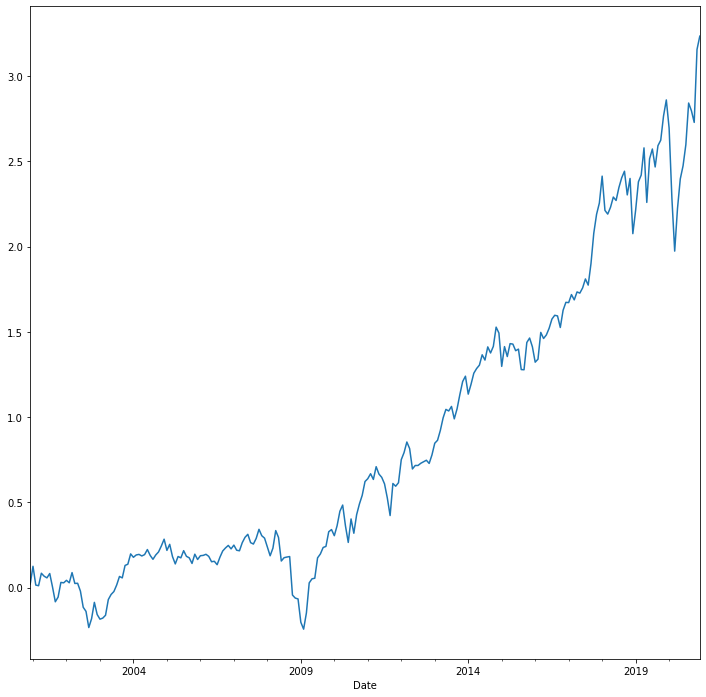

In [213]:
((1 + dffull.filter(regex='_re').sum(1) / 10).cumprod() - 1).plot(figsize=(12,12))